In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [201]:
data = pd.read_csv("winequality-red.csv")

In [202]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [203]:
data.shape

(1599, 12)

In [204]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [206]:
data.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [207]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [208]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


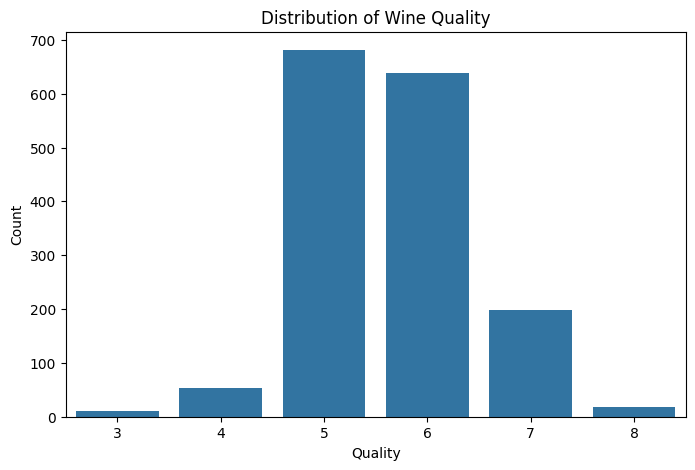

In [209]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

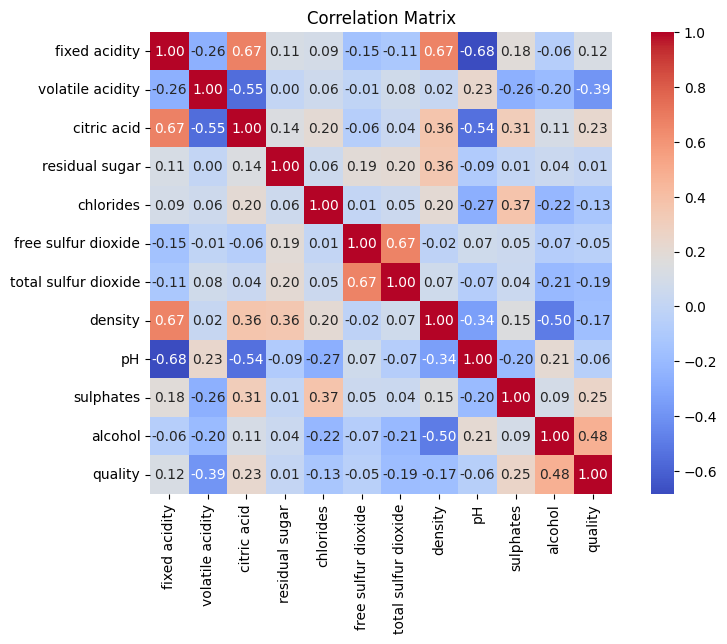

In [210]:
plt.figure(figsize=(10, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [211]:
# sns.pairplot(data, hue='quality', diag_kind='kde')
# plt.title('Pairplot of Features Colored by Quality')
# plt.show()

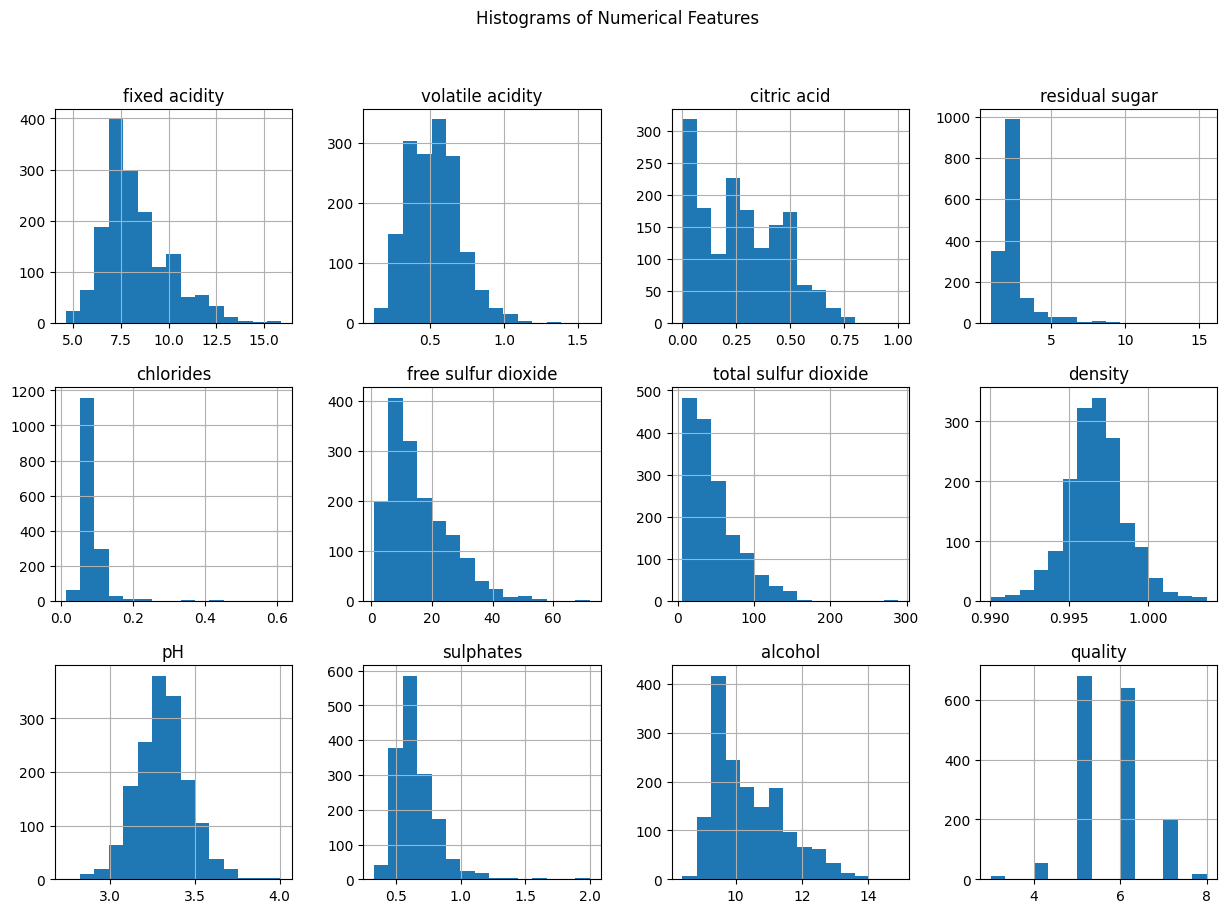

In [212]:
data.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [213]:
data.skew()

,0
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,4.540655
chlorides,5.680347
free sulfur dioxide,1.250567
total sulfur dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


In [214]:
df = data.copy()

In [215]:
numerical_features = data.columns[:-1]

yeo_johnson = PowerTransformer(method='yeo-johnson')

df[numerical_features] = yeo_johnson.fit_transform(df[numerical_features])

In [216]:
df.skew()

,0
fixed acidity,0.002529
volatile acidity,0.003099
citric acid,0.017788
residual sugar,-0.015715
chlorides,-0.151304
free sulfur dioxide,-0.009948
total sulfur dioxide,-0.003752
density,-0.005054
pH,-0.002822
sulphates,0.009985


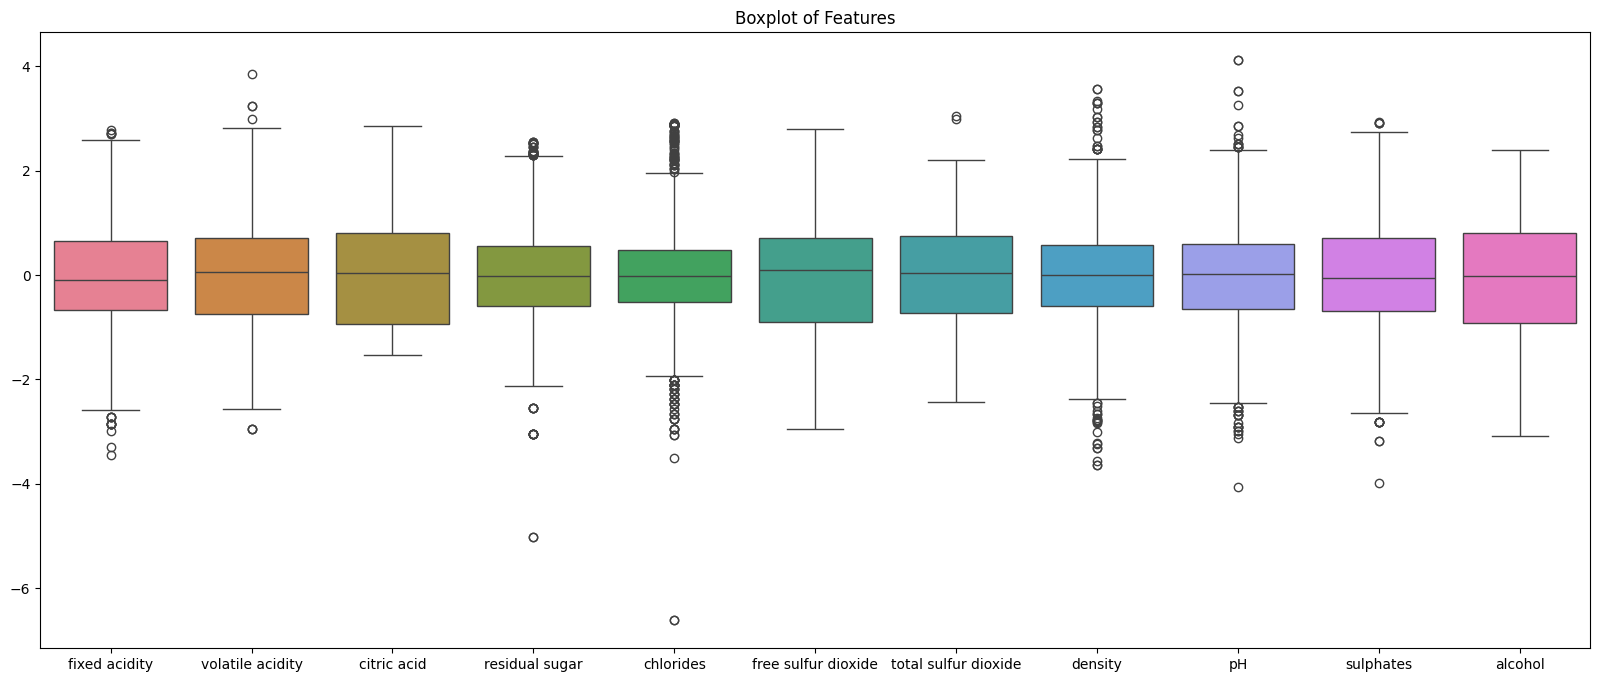

In [217]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot of Features')
plt.show()

In [218]:
df2 = df.copy()
for feature in numerical_features:
    Q1 = df2[feature].quantile(0.25)
    Q3 = df2[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df2[feature].median()

    df2[feature] = np.where(df2[feature] < lower_bound, median, df2[feature])
    df2[feature] = np.where(df2[feature] > upper_bound, median, df2[feature])

In [219]:
le = LabelEncoder()
df2['quality'] = le.fit_transform(df2['quality'])

In [220]:
df2['quality'].value_counts()

,count
quality,
2,681
3,638
4,199
1,53
5,18
0,10


In [221]:
X = df2.drop('quality',axis=1)
y = df2['quality']

In [222]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [223]:
scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [224]:
X_train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.646780,0.401511,-0.114356,0.512213,0.032193,0.279271,0.933673,-1.959344,1.044011,0.192920,1.644072
1,1.829531,-0.899477,1.873225,0.197356,-0.041368,-0.151378,-0.608324,-0.553945,-2.303398,0.192920,1.774591
2,-0.478211,-0.760562,1.068045,-0.400070,0.245117,0.077330,0.869131,0.294473,0.217463,-0.697501,-1.408381
3,2.266313,-1.114754,1.232677,1.279022,0.991352,0.372086,0.525623,0.022962,-1.914781,1.160276,-0.926616
4,0.452177,2.093776,-1.183447,-0.911052,-0.270160,-1.347959,-0.933017,-0.334732,-0.064974,-2.078284,-0.780015


# Clustering

In [225]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

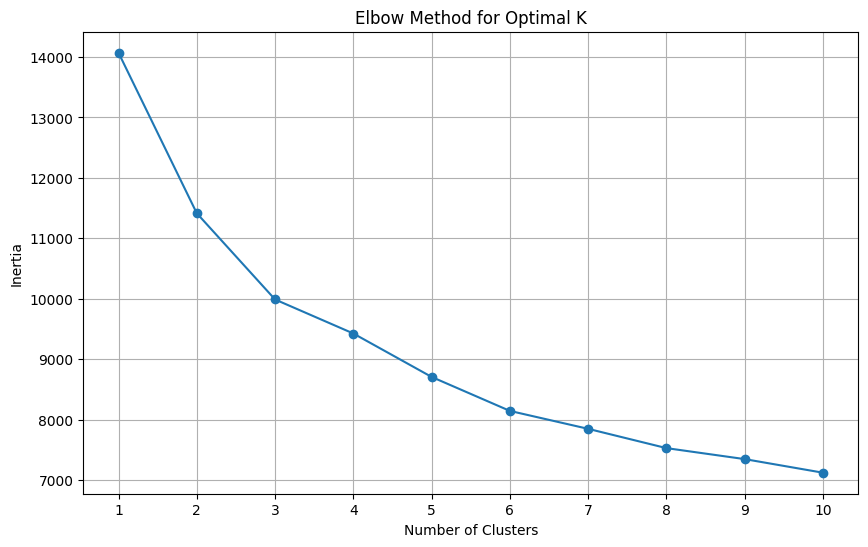

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [234]:
k_means = KMeans(n_clusters=4, random_state=0)
X_train_scaled['cluster'] = k_means.fit_predict(X_train_scaled)

In [228]:
X_test_scaled['cluster'] = kmeans.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [229]:
pca = PCA(n_components=2)

reduced_X = pd.DataFrame(pca.fit_transform(X_train_scaled), columns=["PC1","PC2"])
reduced_X

,PC1,PC2
0,-2.287014,-0.465248
1,2.683618,-1.800329
2,0.652704,0.925255
3,3.261460,0.699350
4,-2.114982,-0.055651
...,...,...
1274,0.558376,0.783221
1275,-0.771329,2.738834
1276,2.374977,-2.307051
1277,-1.743380,-1.400309


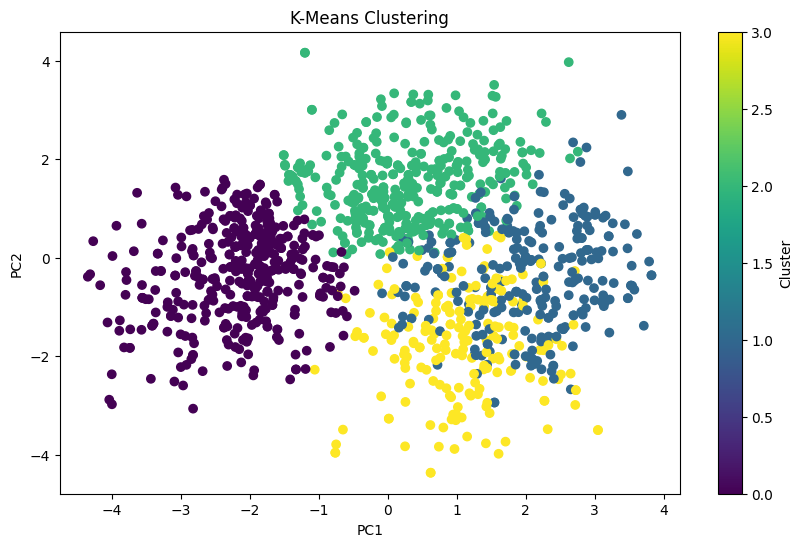

In [230]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_X['PC1'][:], reduced_X['PC2'][:], c=X_train_scaled['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()